<a href="https://colab.research.google.com/github/aelukin/ML_ITMO/blob/main/watch_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Монтируем диск, задаем директорию

In [403]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [404]:
%cd gdrive/MyDrive/ML\ ITMO

[Errno 2] No such file or directory: 'gdrive/MyDrive/ML ITMO'
/content/gdrive/MyDrive/ML ITMO


Импортируем библиотеки

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импортируем датасет

In [406]:
path='Watches.csv'
data=pd.read_csv(path, index_col='Unnamed: 0')

<ipython-input-406-50ca43d5d0b5>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path, index_col='Unnamed: 0')


# Часть 1. Проверка и очистка данных

In [407]:
data.head()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition
0,Audemars Piguet Royal Oak Offshore Chronograph...,"$43,500",Audemars Piguet,Royal Oak Offshore Chronograph,26237ST.OO.1000ST.01,NaN,NaN,NaN,2019,Unworn,Men's watch/Unisex,42 mm,NaN
1,Audemars Piguet Royal Oak Selfwinding\n39mm Bl...,"$71,500",Audemars Piguet,Royal Oak Selfwinding,15300ST.OO.1220ST.02,NaN,NaN,NaN,2012,Very good,Men's watch/Unisex,39 mm,NaN
2,Audemars Piguet Royal Oak Chronograph\nBlue Di...,"$79,191",Audemars Piguet,Royal Oak Chronograph,26331ST,Automatic,Steel,Steel,Unknown,Unworn,NaN,41 mm,NaN
3,Audemars Piguet Royal Oak Chronograph\nSelfwin...,"$108,000",Audemars Piguet,Royal Oak Chronograph,26715ST.OO.1356ST.01,Automatic,Steel,Steel,2022 (Approximation),New,Men's watch/Unisex,38 mm,NaN
4,Audemars Piguet Royal Oak Offshore Chronograph...,"$27,500",Audemars Piguet,Royal Oak Offshore Chronograph,26170ST.OO.1000ST.01,Automatic,Steel,Steel,Unknown,Very good,Men's watch/Unisex,42 x 54 mm,NaN


In [408]:
data.tail()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition
6438,Zenith Defy El Primero\n21 TITANIUM 95.9000.90...,"$9,790",Zenith,Defy El Primero,95.9000.9004/78.M9000,NaN,NaN,NaN,2022,Very good,Men's watch/Unisex,44 mm,NaN
6439,Zenith Chronomaster Sport\n41mm White 03.3100....,"$8,450",Zenith,Chronomaster Sport,03.3100.3600/69.M3100,NaN,NaN,NaN,2021 (Approximation),Very good,Men's watch/Unisex,41 mm,NaN
6440,Zenith El Primero\n50th Anniversary A386 Limited,"$16,500",Zenith,El Primero,30.A386.400/69.C807,NaN,NaN,NaN,2019,Very good,Men's watch/Unisex,38 mm,NaN
6441,Zenith Chronomaster Sport\nWhite Dial Chronogr...,"$9,000",Zenith,Chronomaster Sport,03.3100.3600/69.M3100,NaN,NaN,NaN,2021,Unworn,Men's watch/Unisex,41 mm,NaN
6442,Zenith El Primero Chronomaster\n03.2040.400/69...,"$6,833",Zenith,El Primero Chronomaster,NaN,Automatic,Steel,Leather,2019,Very good,NaN,42 mm,NaN


Проверка данных

In [409]:
data.columns

Index(['name', 'price', 'brand', 'model', 'ref', 'mvmt', 'casem', 'bracem',
       'yop', 'cond', 'sex', 'size', 'condition'],
      dtype='object')

In [410]:
data.shape

(284491, 13)

In [411]:
data.dtypes

name         object
price        object
brand        object
model        object
ref          object
mvmt         object
casem        object
bracem       object
yop          object
cond         object
sex          object
size         object
condition    object
dtype: object

In [412]:
data.isna().sum()

name          72585
price           406
brand           131
model         30466
ref           43152
mvmt         196685
casem        164271
bracem       174896
yop             134
cond          75987
sex           95805
size          23597
condition    212922
dtype: int64

In [413]:
data.describe()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition
count,211906,284085,284360,254025,241339,87806,120220,109595,284357,208504,188686,260894,71569
unique,148689,36830,28,948,33223,3,17,23,410,7,2,6699,7
top,Omega Speedmaster Professional Moonwatch\nCo-A...,Price on request,Rolex,Datejust 36,126334,Automatic,Steel,Steel,Unknown,Very good,Men's watch/Unisex,40 mm,Very good
freq,171,14259,72484,9473,2081,65600,75793,49605,95957,71604,158841,34254,36136


In [414]:
data['brand'].unique()

array(['Audemars Piguet', 'Cartier', 'Tudor', nan, 'Breitling', 'Oris',
       'Richard Mille', 'Hublot', 'IWC', 'Jaeger-LeCoultre', 'Longines',
       'Omega', 'Panerai', 'Patek Philippe', 'Rolex', 'Seiko', 'Sinn',
       'Edox', 'NOMOS', 'Zenith', 'Tissot', 'Hamilton', 'Meistersinger',
       'Rado', 'Montblanc', 'TAG Heuer', 'Ebel', 'A. Lange & Söhne',
       'Vacheron Constantin'], dtype=object)

In [415]:
data['mvmt'].unique()

array([nan, 'Automatic', 'Manual winding', 'Quartz'], dtype=object)

In [416]:
data['casem'].unique()

array([nan, 'Steel', 'Titanium', 'White gold', 'Ceramic', 'Rose gold',
       'Yellow gold', 'Gold/Steel', 'Platinum', 'Carbon', 'Red gold',
       'Tantalum', 'Aluminum', 'Bronze', 'Plastic', 'Silver', 'Palladium',
       'Tungsten'], dtype=object)

In [417]:
data['bracem'].unique()

array([nan, 'Steel', 'Rubber', 'Crocodile skin', 'White gold', 'Ceramic',
       'Rose gold', 'Yellow gold', 'Titanium', 'Calf skin', 'Gold/Steel',
       'Leather', 'Platinum', 'Satin', 'Textile', 'Red gold',
       'Lizard skin', 'Plastic', 'Aluminium', 'Silicon', 'Shark skin',
       'Silver', 'Snake skin', 'Ostrich skin'], dtype=object)

In [418]:
data['cond'].unique()

array(['Unworn', 'Very good', 'New', 'Good', 'Fair', nan, 'Poor',
       'Incomplete'], dtype=object)

In [419]:
data['sex'].unique()

array(["Men's watch/Unisex", nan, "Women's watch"], dtype=object)

In [420]:
data['size'].unique()

array(['42 mm', '39 mm', '41 mm', ..., '40 x 10.75 mm', '46 x 17 mm',
       '48 x 57.5 mm'], dtype=object)

In [421]:
data['condition'].unique()

array([nan, 'Very good', 'Unworn', 'Good', 'Fair', 'New', 'Poor',
       'Incomplete'], dtype=object)

Ищем и удаляем дублирующиеся ячейки

In [422]:
data.isna().sum()

name          72585
price           406
brand           131
model         30466
ref           43152
mvmt         196685
casem        164271
bracem       174896
yop             134
cond          75987
sex           95805
size          23597
condition    212922
dtype: int64

In [423]:
data.duplicated().sum()

11398

In [424]:
data=data.drop_duplicates()

In [425]:
data.describe()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition
count,206862,272783,273028,243114,230967,84667,113932,104257,273025,203593,184005,250359,65258
unique,148689,36830,28,948,33223,3,17,23,410,7,2,6699,7
top,Omega Speedmaster Professional Moonwatch\nCo-A...,Price on request,Rolex,Datejust 36,126334,Automatic,Steel,Steel,Unknown,Very good,Men's watch/Unisex,40 mm,Very good
freq,169,11934,66130,8357,1731,63144,72373,47387,91387,71007,155235,32650,33267


In [426]:
data['condition'].notna().sum()+data['cond'].notna().sum()

268851

Идентифицированные проблемы датасета:

*   Колонки 'cond' and 'condition'. Есть основания полагать, что по какой-то причине значения "состояния" разбиты на две колонки, которые необходимо объединить вручную.
*   Цена 'price' в текстовом формате
*   Лишняя информация в столбце 'size'
*   Столбец с годом производства 'yop' требует дополнительной проверки







1. Исправляем проблему с cond и condition


In [427]:
data['cond'] = data['cond'].fillna('')
data['condition'] = data['condition'].fillna('')
data['condition_summed']=data['cond'].astype(str)+data['condition'].astype(str)

In [428]:
data.describe()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,cond,sex,size,condition,condition_summed
count,206862,272783,273028,243114,230967,84667,113932,104257,273025,273093,184005,250359,273093,273093
unique,148689,36830,28,948,33223,3,17,23,410,8,2,6699,8,8
top,Omega Speedmaster Professional Moonwatch\nCo-A...,Price on request,Rolex,Datejust 36,126334,Automatic,Steel,Steel,Unknown,Very good,Men's watch/Unisex,40 mm,,Very good
freq,169,11934,66130,8357,1731,63144,72373,47387,91387,71007,155235,32650,207835,104274


In [429]:
data['cond'].replace('', np.nan, inplace=True)
data['condition'].replace('', np.nan, inplace=True)
data['condition_summed'].replace('', np.nan, inplace=True)

In [430]:
data.condition.value_counts()

Very good     33267
Unworn        12453
New           10186
Good           8004
Fair           1300
Poor             45
Incomplete        3
Name: condition, dtype: int64

In [431]:
data.cond.value_counts()

Very good     71007
New           65565
Unworn        32182
Good          27203
Fair           7446
Poor            148
Incomplete       42
Name: cond, dtype: int64

In [432]:
data.condition_summed.value_counts().sum()

268851

Число значений в модифицированном столбце совпало с расчетным. Теперь можно убрать столбцы cond и condition

In [433]:
data=data.drop(columns=['cond', 'condition'])
data.describe()

,name,price,brand,model,ref,mvmt,casem,bracem,yop,sex,size,condition_summed
count,206862,272783,273028,243114,230967,84667,113932,104257,273025,184005,250359,268851
unique,148689,36830,28,948,33223,3,17,23,410,2,6699,7
top,Omega Speedmaster Professional Moonwatch\nCo-A...,Price on request,Rolex,Datejust 36,126334,Automatic,Steel,Steel,Unknown,Men's watch/Unisex,40 mm,Very good
freq,169,11934,66130,8357,1731,63144,72373,47387,91387,155235,32650,104274


2. Форматируем столбец "Price"

убираем спецсимволы и не-числовые данные

In [434]:
data['price']=data['price'].str.replace('\W','',regex=True)
data['price']=data['price'].str.replace('(\D+)', '',regex=True)
data['price'].replace('', np.nan, inplace=True)

удаляем ячейки с NaN

In [435]:
data=data.dropna(subset=['price'])

Конвертируем столбец в int

In [436]:
data['price']=data['price'].astype(int)

<ipython-input-436-2a10b3d39cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=data['price'].astype(int)


In [437]:
data.dtypes

name                object
price                int64
brand               object
model               object
ref                 object
mvmt                object
casem               object
bracem              object
yop                 object
sex                 object
size                object
condition_summed    object
dtype: object

In [438]:
data.shape

(260849, 12)

In [439]:
data.price.value_counts()

6500      249
4500      239
12500     236
4026      236
8500      225
         ... 
126802      1
88286       1
289294      1
64993       1
45998       1
Name: price, Length: 36829, dtype: int64

3. Форматируем столбец YOP (year of production)

In [440]:
data['yop'].unique()

array(['2019', '2012', 'Unknown', '2022 (Approximation)',
       '2018 (Approximation)', '2016 (Approximation)', '2015', '2016',
       '2022', '2014', '2021', '2018', '2017', '2005', '2006', '2023',
       '2002', '2004', '1994', '2021 (Approximation)', '2020',
       '2020 (Approximation)', '2013', '2019 (Approximation)',
       '2023 (Approximation)', '2007', '2017 (Approximation)', '2008',
       '1929', '2011', '2010', '2012 (Approximation)', '1977', '2003',
       '1999 (Approximation)', '2010 (Approximation)', '1960', '1990',
       '1980', '2009 (Approximation)', '2009', '1976 (Approximation)',
       '2000', '2004 (Approximation)', '1989', '1982', '1975',
       '2005 (Approximation)', '1990 (Approximation)',
       '1970 (Approximation)', '1995 (Approximation)',
       '1998 (Approximation)', '1995', '1998', '1996 (Approximation)',
       '1980 (Approximation)', '1979', '1996', '2011 (Approximation)',
       '2008 (Approximation)', '1986', '1950 (Approximation)', '1967',
    

In [441]:
data['yop'].isna().sum()

0

In [442]:
data['yop'].count

<bound method Series.count of 0                       2019
1                       2012
2                    Unknown
3       2022 (Approximation)
4                    Unknown
                ...         
6438                    2022
6439    2021 (Approximation)
6440                    2019
6441                    2021
6442                    2019
Name: yop, Length: 260849, dtype: object>

In [443]:
data['yop']=data['yop'].str.replace('\W','',regex=True)
data['yop']=data['yop'].str.replace('(\D+)', '',regex=True)
data['yop'].replace('', np.nan, inplace=True)

In [444]:
data['yop'].unique()

array(['2019', '2012', nan, '2022', '2018', '2016', '2015', '2014',
       '2021', '2017', '2005', '2006', '2023', '2002', '2004', '1994',
       '2020', '2013', '2007', '2008', '1929', '2011', '2010', '1977',
       '2003', '1999', '1960', '1990', '1980', '2009', '1976', '2000',
       '1989', '1982', '1975', '1970', '1995', '1998', '1996', '1979',
       '1986', '1950', '1967', '1997', '1981', '2001', '1955', '1991',
       '1992', '1983', '1985', '1984', '1993', '1988', '1978', '1987',
       '1971', '1969', '1972', '1974', '1973', '1962', '1965', '1968',
       '1948', '1961', '1952', '1956', '1886', '1920', '1958', '1945',
       '1941', '1966', '1910', '1905', '1940', '1928', '1957', '1964',
       '1884', '1959', '1963', '1946', '1947', '1944', '1953', '1951',
       '1954', '1949', '1750', '1930', '1942', '1741', '1935', '1924',
       '1899', '1881', '1900', '1921', '1915', '1922', '1908', '1937',
       '1890', '1898', '1911', '1912', '1943', '1927', '1894', '1916',
       '1

In [445]:
data['yop'].isna().sum()

87140

4. Форматируем столбец **size**

In [446]:
data['size'].unique()

array(['42 mm', '39 mm', '41 mm', ..., '40 x 10.75 mm', '46 x 17 mm',
       '48 x 57.5 mm'], dtype=object)

In [447]:
data['size'].value_counts()

40 mm             31119
41 mm             25136
42 mm             23198
36 mm             17834
44 mm             13274
                  ...  
34.5 x 35 mm          1
38.6 x 38,6 mm        1
31.5 x 38 mm          1
26.8 x 32.5 mm        1
48 x 57.5 mm          1
Name: size, Length: 6595, dtype: int64

Информация о диаметре корпуса содержится в первом числе. Вторым числом является либо толщина, либо дополнительное измерение корпуса (в случае часов квадратной/овальной формы). Оставляем только диаметр.

In [448]:
data['size']=data['size'].str[0:2]

In [449]:
data['size'].unique()

array(['42', '39', '41', '38', '44', '37', nan, '34', '36', '45', '43',
       '23', '33', '24', '40', '48', '31', '29', '35', '22', '26', '25',
       '90', '65', '15', '30', '28', '32', '47', 'Re', 'Br', '64', '14',
       'Au', '20', '50', '49', '18', '51', '27', '16', '68', '21', '46',
       '61', 'Li', 'Ma', '69', '70', '55', '54', '17', '[P', 'Th', 'Mo',
       '57', '-M', '8 ', '8S', 'Pr', '19', '59', '56', 'I ', '53', '52',
       'De', 'Yo', 'Su', '13', 'Of', '58', '"A', 'Ai', '【a', '72', '84',
       'Or', '11', '3 ', 'Fo', '75', '12', '85', '6.', 'XL', 'ma', '78',
       '63', 'Ca', '73', 'St', '79', '60', '10', '7.', '"R', 'Am', 'In',
       '"P', 'Pa', 'Ba', 'Wa', 'A ', '7,', '"C', 'It', '"T', 'Sc', 'Sa',
       '[S', '*B', '"M', '"E', '"N', '【r', 'SP', 'IT', 'La', 'Mi', '9 ',
       '5.', '6 ', 'Lo', 'Hu', '※O', '91', 'Ce', 'Un', 'IW', 'iw', '*D',
       '*S', '5 ', '[B', 'ca', '[N', '4 ', '80', 'Vi', '2 ', 'Ne', '96',
       'Ja', '76', '66', 'On', 'JL', 'WE', '1.', '3.

In [450]:
data['size']=data['size'].str.replace('\W','',regex=True)
data['size']=data['size'].str.replace('(\D+)', '',regex=True)
data['size'].replace('', 0, inplace=True)
data['size'].replace(np.nan, 0, inplace=True)

In [451]:
data['size']=data['size'].astype(int)

In [452]:
data['size'].unique()

array([42, 39, 41, 38, 44, 37,  0, 34, 36, 45, 43, 23, 33, 24, 40, 48, 31,
       29, 35, 22, 26, 25, 90, 65, 15, 30, 28, 32, 47, 64, 14, 20, 50, 49,
       18, 51, 27, 16, 68, 21, 46, 61, 69, 70, 55, 54, 17, 57,  8, 19, 59,
       56, 53, 52, 13, 58, 72, 84, 11,  3, 75, 12, 85,  6, 78, 63, 73, 79,
       60, 10,  7,  9,  5, 91,  4, 80,  2, 96, 76, 66,  1, 67, 71, 93, 83,
       62])

<Axes: >

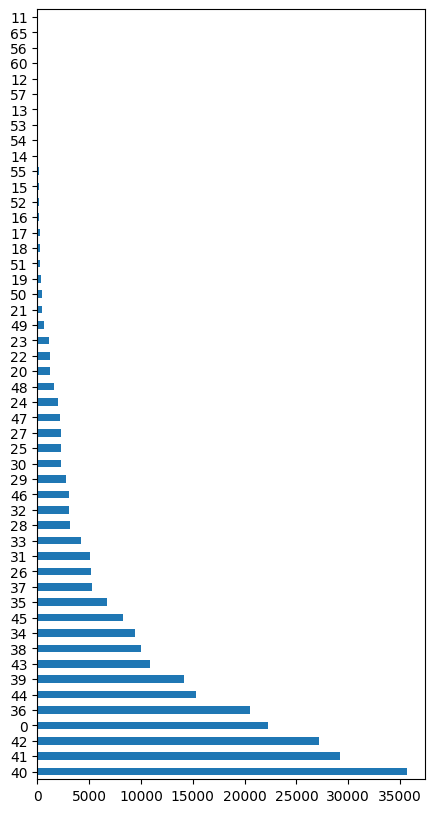

In [453]:
data['size'].value_counts()[:50].plot(kind='barh',figsize=(5,10))

In [454]:
data['size'].value_counts()[:50]

40    35625
41    29233
42    27151
0     22287
36    20502
44    15309
39    14173
43    10856
38     9980
34     9408
45     8232
35     6672
37     5274
26     5201
31     5050
33     4200
28     3111
32     3031
46     3022
29     2792
30     2318
25     2296
27     2225
47     2142
24     1979
48     1584
20     1196
22     1173
23     1127
49      640
21      429
50      395
19      346
51      253
18      229
17      208
16      193
52      175
15      147
55      116
14       83
54       81
53       69
13       35
57       27
12       24
60       23
56       23
65       18
11       18
Name: size, dtype: int64

In [455]:
data['size'] = data['size'].mask((data['size'] > 55) | (data['size'] < 15), np.nan)

In [456]:
data['size'].value_counts()

40.0    35625
41.0    29233
42.0    27151
36.0    20502
44.0    15309
39.0    14173
43.0    10856
38.0     9980
34.0     9408
45.0     8232
35.0     6672
37.0     5274
26.0     5201
31.0     5050
33.0     4200
28.0     3111
32.0     3031
46.0     3022
29.0     2792
30.0     2318
25.0     2296
27.0     2225
47.0     2142
24.0     1979
48.0     1584
20.0     1196
22.0     1173
23.0     1127
49.0      640
21.0      429
50.0      395
19.0      346
51.0      253
18.0      229
17.0      208
16.0      193
52.0      175
15.0      147
55.0      116
54.0       81
53.0       69
Name: size, dtype: int64